# Green AI project : Water polution

## Importations

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Adding the dataset

In [49]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

In [50]:
train.head()

,Unnamed: 0,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,6,CAS_7723-14-0,2009,2009-01--2009-12,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
1,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


### Adding the test set and the targets

In [51]:
df = pd.concat([train, test])
targets = pd.concat([target, submission])

df['polution'] = targets['polution']
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,CAS_7723-14-0,2009,2009-01--2009-12,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


## Data cleaning

In [52]:
print("DataFrame shape : ",train.shape)

DataFrame shape :  (2318, 18)


In [53]:
print("Column name dictionnary : ")
column_names_dict = {column: index for index, column in enumerate(train.columns)}
print(column_names_dict)

Column name dictionnary : 
{'Unnamed: 0': 0, 'code': 1, 'year': 2, 'period': 3, 'id': 4, 'Country': 5, 'tourists': 6, 'venue': 7, 'rate': 8, 'food': 9, 'glass': 10, 'metal': 11, 'other': 12, 'paper': 13, 'plastic': 14, 'leather': 15, 'green_waste': 16, 'waste_recycling': 17}


### Searching for missing values

In [54]:
def cheking_for_missing_values() : 
    missing_values = train.isnull().sum()
    print("\nTotal missing values in each column:")
    print(missing_values)

cheking_for_missing_values()


Total missing values in each column:
Unnamed: 0          0
code                0
year                0
period              0
id                  0
Country            17
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
dtype: int64


In [55]:
train = train.dropna()
cheking_for_missing_values()


Total missing values in each column:
Unnamed: 0         0
code               0
year               0
period             0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
dtype: int64


### Drop any duplicate

In [56]:
train.drop_duplicates(inplace=True)

In [59]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])
df_numbers.head()


,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,2009,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,2009,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,2009,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,2009,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,2009,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


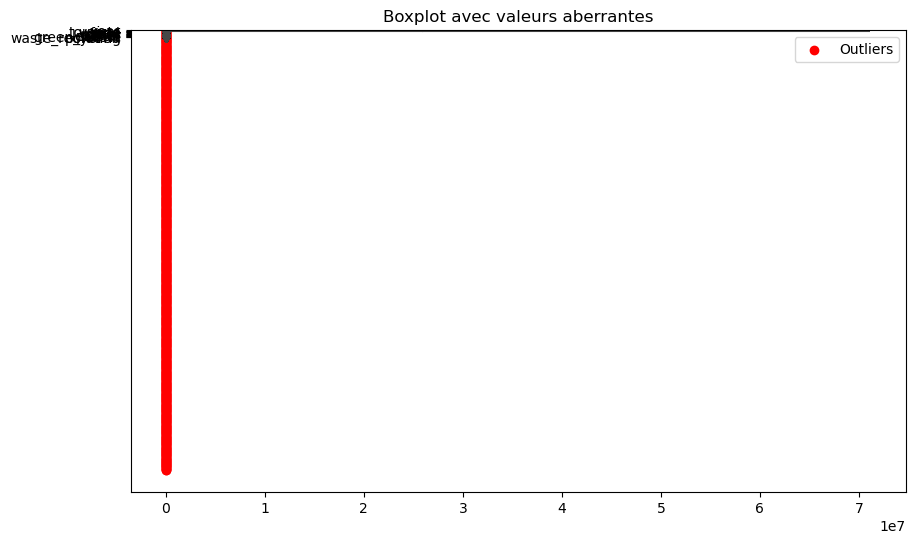

In [60]:
Q1 = df_numbers.quantile(0.25)
Q3 = df_numbers.quantile(0.75)
IQR = Q3 - Q1

# Détection des valeurs aberrantes
outliers = ((df_numbers < (Q1 - 1.5 * IQR)) | (df_numbers > (Q3 + 1.5 * IQR))).any(axis=1)

# Création d'un boxplot pour mettre en évidence les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h")
plt.scatter(df_numbers[outliers].iloc[:, 0], range(len(df_numbers[outliers])), color='r', label='Outliers')
plt.legend()
plt.title('Boxplot avec valeurs aberrantes')
plt.show()